# Optimizers

In [1]:
import numpy as np
np.random.seed(222)
import tensorflow as tf
tf.random.set_seed(222)
from matplotlib import pyplot as plt
%matplotlib inline
import skimage.io as io
import skimage.transform as T

In [2]:
from neural_stylization.transfer_style import Stylizer
from neural_stylization.optimizers import GradientDescent, Adam, L_BFGS
from neural_stylization.util.build_callback import build_callback

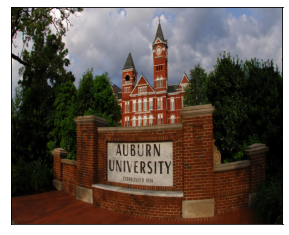

In [3]:
content = io.imread('img/content/samford-sign.jpg')
content = T.resize(content, (400, 500), preserve_range=True).astype('uint8')
ax = plt.imshow(content)
ax.axes.xaxis.set_major_locator(plt.NullLocator())
ax.axes.yaxis.set_major_locator(plt.NullLocator())

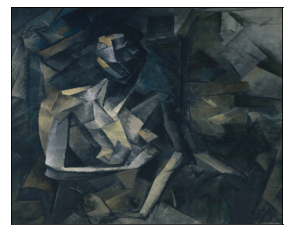

In [4]:
style = io.imread('img/styles/seated-nude.jpg')
style = T.resize(style, content.shape[:-1], preserve_range=True).astype('uint8')
ax = plt.imshow(style)
ax.axes.xaxis.set_major_locator(plt.NullLocator())
ax.axes.yaxis.set_major_locator(plt.NullLocator())

In [5]:
def stylize(optimizer, iterations: int):
    """
    Stylize the image.
    
    Args:
        optimizer: the optimizer method to use
        iterations: the number of iterations to optimize
        
    Returns: a stylized image
    """
    # create a stylization algorithm
    sty = Stylizer(content_weight=1, style_weight=1e4)
    # create directories for build artifacts
    build_dir = 'build/loss/{}'.format(optimizer.__class__.__name__)
    # run the stlization algorithm and store the result
    output = sty(
        content=content,
        style=style,
        optimize=optimizer,
        iterations=iterations,
        callback=build_callback(build_dir)
    )
    # save the image to the tex directory
    io.imsave('img/loss/{}.png'.format(optimizer.__class__.__name__), output)

In [6]:
# the maximum number of times each optimizer is allowed to 
# evaluate the gradients before termination
max_evaluations = 250

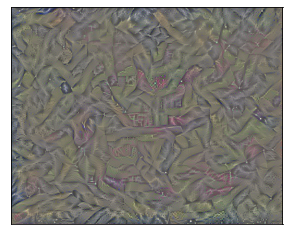

100%|██████████| 250/250 [01:19<00:00,  3.13it/s]


In [7]:
gd = GradientDescent(learning_rate=5e-7)
stylize(gd, max_evaluations)

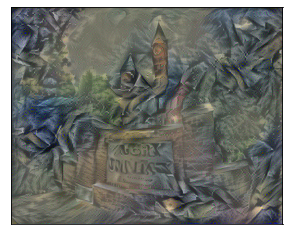

100%|██████████| 250/250 [01:09<00:00,  3.61it/s]


In [8]:
adam = Adam(learning_rate=1e2)
stylize(adam, max_evaluations)

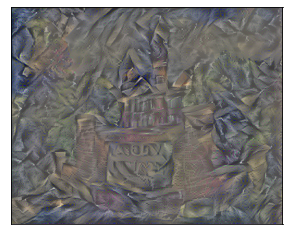

100%|██████████| 12/12 [01:01<00:00,  5.17s/it]


In [9]:
# L-BFGS has its own maximum evaluation
# per iteration setting
lbfgs = L_BFGS(max_evaluations=20)
stylize(lbfgs, int(max_evaluations / 20))

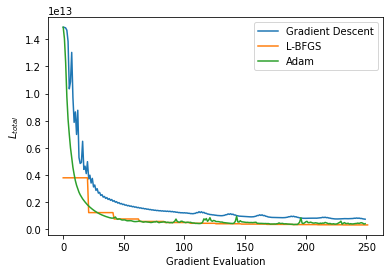

In [11]:
plt.plot(gd.loss_history)
plt.plot(lbfgs.loss_history)
plt.plot(adam.loss_history)
plt.legend(['Gradient Descent', 'L-BFGS', 'Adam'])
plt.ylabel('$L_{total}$')
plt.xlabel('Gradient Evaluation')
plt.savefig('img/loss/plot.png')